In [1]:
import pandas as pd
from pycaret.time_series import *

In [2]:
from pycaret.utils import version

In [3]:
version()

'3.0.0.rc3'

In [4]:
# columns of interest
features = ['date',
            'location', 
            'new_tests_per_thousand',
            'new_cases_per_million',
            'total_cases_per_million',
            'tests_per_case',
            'positive_rate',                    
            'reproduction_rate',                       
            'stringency_index',
            'total_deaths_per_million',
            'new_deaths_per_million']           

In [5]:
# download the full covid data from our-world-in-data
url_data = (r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df = pd.read_csv(url_data, 
                 usecols = features)

In [6]:
# reorder columns
df = df[features]

In [7]:
# set date as index
df.set_index('date', inplace=True)

In [8]:
# Converting the index as date
df.index = pd.to_datetime(df.index)

In [9]:
df.columns

Index(['location', 'new_tests_per_thousand', 'new_cases_per_million',
       'total_cases_per_million', 'tests_per_case', 'positive_rate',
       'reproduction_rate', 'stringency_index', 'total_deaths_per_million',
       'new_deaths_per_million'],
      dtype='object')

In [10]:
# check data type
df.dtypes

location                     object
new_tests_per_thousand      float64
new_cases_per_million       float64
total_cases_per_million     float64
tests_per_case              float64
positive_rate               float64
reproduction_rate           float64
stringency_index            float64
total_deaths_per_million    float64
new_deaths_per_million      float64
dtype: object

In [11]:
df.head(5)

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million
date,,,,,,,,,,
2020-02-24,Afghanistan,NaN,0.125,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-25,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-26,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-27,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-28,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN


In [12]:
df.tail(5)

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million
date,,,,,,,,,,
2022-08-31,Zimbabwe,NaN,1.125,16051.872,NaN,NaN,NaN,NaN,349.892,0.188
2022-09-01,Zimbabwe,NaN,0.750,16052.622,NaN,NaN,NaN,NaN,349.892,0.000
2022-09-02,Zimbabwe,NaN,0.375,16052.997,NaN,NaN,NaN,NaN,349.892,0.000
2022-09-03,Zimbabwe,NaN,0.688,16053.685,NaN,NaN,NaN,NaN,349.892,0.000
2022-09-04,Zimbabwe,NaN,0.500,16054.185,NaN,NaN,NaN,NaN,349.892,0.000


In [13]:
# filter by country
def filter_country(dataframe:pd.DataFrame, LOCATION:str):
  """Filter dataframe by country. """
  return dataframe[dataframe.location == LOCATION]

# filter by date
def filter_date(dataframe:pd.DataFrame, start_date:str, end_date:str)->pd.DataFrame:
  """Filter dataframe by date range including start_date and end_date. """
  return dataframe.loc[(dataframe.index >= start_date) & (dataframe.index <= end_date)]

In [14]:
## crop date
#df_germany = filter_date(df_germany, '2020-03-10', '2022-09-01')
#df_germany.head(100)

# Data Visualization

In [15]:
# check number of unique countries
df['location'].nunique()

244

In [16]:
#country = 'Germany'
#country = 'France'
country = 'Italy'
df_country = filter_country(df, country)

In [17]:
## add target i.e. deaths in 14 days
#df_country['new_deaths_per_million' + '_future'] = df_country['new_deaths_per_million'].shift(-28)
#df_country.head()

In [18]:
# plot multiple time series with moving avgs in a loop
import plotly.express as px
fig = px.line(df_country, x=df_country.index, y=["new_deaths_per_million"], title = country, template = 'plotly_dark')
fig.show()

# Temporal Smoothing

In [19]:
df_country.head()

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million
date,,,,,,,,,,
2020-01-31,Italy,NaN,0.034,0.034,NaN,NaN,NaN,19.44,NaN,NaN
2020-02-01,Italy,NaN,0.000,0.034,NaN,NaN,NaN,19.44,NaN,NaN
2020-02-02,Italy,NaN,0.000,0.034,NaN,NaN,NaN,19.44,NaN,NaN
2020-02-03,Italy,NaN,0.000,0.034,NaN,NaN,NaN,19.44,NaN,NaN
2020-02-04,Italy,NaN,0.000,0.034,NaN,NaN,NaN,19.44,NaN,NaN


In [20]:
for feat in df_country.columns[1:]:
    print(feat)
    # let´s smooth all datausing rolling window of 21 days
    df_country[feat] = df_country[feat].rolling(21, center=False).median()


new_tests_per_thousand
new_cases_per_million
total_cases_per_million
tests_per_case
positive_rate
reproduction_rate
stringency_index
total_deaths_per_million
new_deaths_per_million


<AxesSubplot: xlabel='date'>

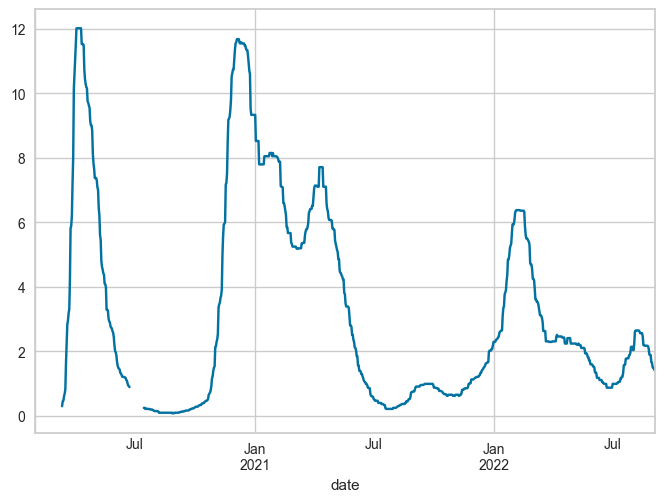

In [21]:
df_country['new_deaths_per_million'].plot()

In [22]:
# add month info
df_country['month'] = df_country.index.month
df_country['dayofweek'] = df_country.index.dayofweek

# Delete Features with too much missing data

In [23]:
df_country.head()

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million,month,dayofweek
date,,,,,,,,,,,,
2020-01-31,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4
2020-02-01,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5
2020-02-02,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
2020-02-03,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2020-02-04,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1


In [24]:
df_country.isna().sum()

location                      0
new_tests_per_thousand      141
new_cases_per_million        41
total_cases_per_million      20
tests_per_case              146
positive_rate               146
reproduction_rate            53
stringency_index             26
total_deaths_per_million     41
new_deaths_per_million       62
month                         0
dayofweek                     0
dtype: int64

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_train, df_test = train_test_split(df_country, test_size=0.2, shuffle=False, random_state=123)

<AxesSubplot: xlabel='date'>

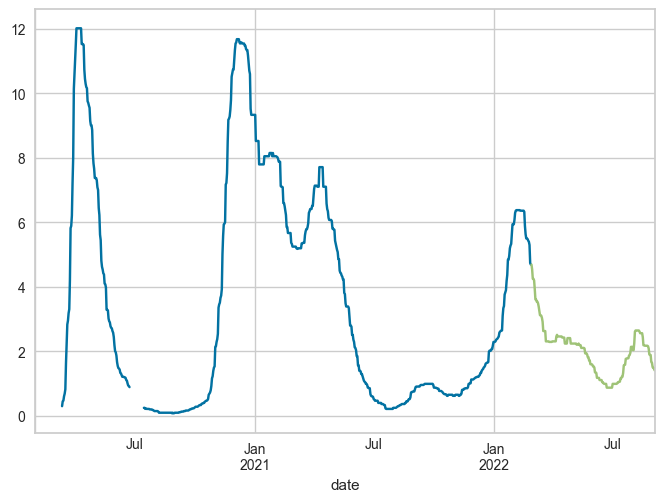

In [27]:
df_train['new_deaths_per_million'].plot()
df_test['new_deaths_per_million'].plot()

# Temporal Modeling

In [28]:
df_country.head()

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million,month,dayofweek
date,,,,,,,,,,,,
2020-01-31,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4
2020-02-01,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5
2020-02-02,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
2020-02-03,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2020-02-04,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1


In [29]:
s = setup(df_train,
          target='new_deaths_per_million',
          ignore_features=['location', 'month', 'dayofweek', 'new_tests_per_thousand', 'tests_per_case', 'positive_rate'], 
          fold=2, 
          fh=100, 
          fold_strategy='sliding',
          numeric_imputation_target='median', 
          numeric_imputation_exogenous='median',
          session_id=123)

,Description,Value
0,session_id,123
1,Target,new_deaths_per_million
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(758, 6)"
5,Transformed data shape,"(758, 6)"
6,Transformed train set shape,"(658, 6)"
7,Transformed test set shape,"(100, 6)"
8,Rows with missing values,13.1%
9,Fold Generator,SlidingWindowSplitter


In [30]:
#check_stats()

In [31]:
plot_model(plot='train_test_split')

In [32]:
plot_model(plot='cv')

In [33]:
#plot_model(plot='acf')

In [34]:
#plot_model(plot='pacf')

In [35]:
#plot_model(plot='diagnostics')

In [36]:
# train model

include=['arima', 'ridge_cds_dt', 'en_cds_dt', 'gbr_cds_dt', 'rf_cds_dt', 'knn_cds_dt']
#include=['gbr_cds_dt', 'rf_cds_dt', 'knn_cds_dt']
best_model = compare_models(include=include,
                            sort='MAE')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.9893,1.3395,1.4415,1.6210,3.1811,0.6875,-1.7046,2.2850
arima,ARIMA,2.2549,1.7972,1.5574,2.0977,4.3409,0.8521,-7.2990,2.8000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,2.4961,1.5794,1.6442,1.7048,3.0832,0.9483,-16.7051,1.9250
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,2.3298,1.5489,1.6920,1.8803,3.7778,0.7276,-2.4809,2.9500
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3.2389,2.0949,2.3648,2.5638,5.0783,0.8077,-4.8371,1.9600
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,4.1181,2.6206,2.9213,3.1097,6.0762,0.9749,-12.7034,1.8850


In [37]:
best_model

BaseCdsDtForecaster(regressor=GradientBoostingRegressor(random_state=123), sp=7,
                    window_length=7)

In [38]:
#best_model.get_params()

In [39]:
# hyperparameter tuning...takes some time
#tune_model(best_model)

In [40]:
#predict_model(best_model, fh=60)

In [41]:
plot_model(best_model, plot='forecast')

In [42]:
best_model = finalize_model(best_model)

In [43]:
X_exog = df_test[['new_cases_per_million', 'total_cases_per_million', 'reproduction_rate', 'stringency_index', 'total_deaths_per_million']]

In [44]:
X_exog.shape

(190, 5)

In [45]:
pred = predict_model(estimator=best_model, 
                     X=X_exog.iloc[:df_test.shape[0],:],   fh=df_test.shape[0])

In [46]:
df_test['y_pred'] = pred.values.reshape(-1)
df_test.tail()

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million,month,dayofweek,y_pred
date,,,,,,,,,,,,,
2022-08-31,Italy,NaN,395.592,365468.390,NaN,NaN,NaN,NaN,2949.376,1.519,8,2,4.1372
2022-09-01,Italy,NaN,371.284,365644.233,NaN,NaN,NaN,NaN,2950.642,1.485,9,3,4.1149
2022-09-02,Italy,NaN,368.229,366241.073,NaN,NaN,NaN,NaN,2952.904,1.485,9,4,4.1218
2022-09-03,Italy,NaN,368.026,366669.632,NaN,NaN,NaN,NaN,2954.794,1.418,9,5,4.1053
2022-09-04,Italy,NaN,368.026,367065.224,NaN,NaN,NaN,NaN,2956.212,1.418,9,6,4.1135


<AxesSubplot: xlabel='date'>

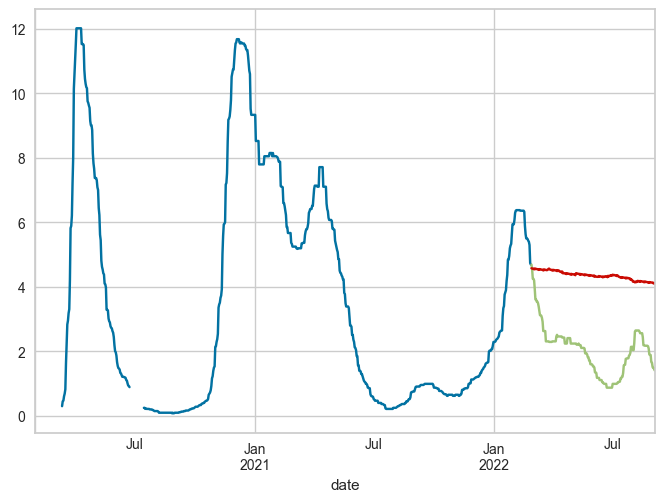

In [47]:
df_train['new_deaths_per_million'].plot()
df_test['new_deaths_per_million'].plot()
df_test['y_pred'].plot()
#pred.plot()